# Introduction
In this Notebook i have done binary classification of Sentiment on a dataset that contains annotated Bangla texts.I have tried to use a deep learning based hybrid network with CNN an LSTM.Through hyper parameter tuning,i have achieved an accuracy of 84% with somewhat overfitting.

My main focus of this notebook is to see the impact of hybrid CNN-BiLSTM model in bangla sentiment analysis and newbie Bangla NLP researchers like me can get a better intution.

# Library & Package Import
I have used KERAS to implement CNN and LSTM in this dataset.

In [1]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Activation,Embedding,Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from keras.optimizers import SGD,Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Predefined Functions 
I have predefined some functions for the preprocessing of my texts.The dataset contains raw text data that have many unwanted things
(Punctuations,English words,emojis etc..).I have cleaned this things with my function.

In [2]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

# Data Import
The data is in excel file.I have about 6500+ in this dataset.The data is either positive or negative.
I have annotated "0" as Negative and "1" as Positive.

In [3]:
df=pd.read_excel('/kaggle/input/pseudolabel/predicted_unsupervised_sentiment.xlsx')
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


Now we will visualize the ratio of Postive and Negative sentiment.We can see that the ratio is closly 1:1.Which is considered as a good balance.

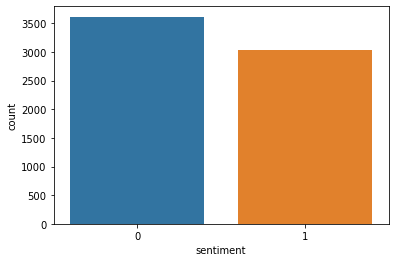

In [4]:
sns.countplot(df['sentiment']);

# Data Preprocessing
At first we will clean the dataset with my predefined function preprocessing().

In [5]:
df['sentence'] = df.sentence.apply(lambda x: preprocessing(str(x)))

In [6]:
df.reset_index(drop=True, inplace=True)

Now I will prepare the dataset to train in the CNN LSTM network.So i have to convert all Sentences into a numpy Array.

I have divided the training and testing data into 80/20 ratio.

I have converted the sentiment values into one hot encodings for the convenient use in model training.


In [7]:
train1, test1 = train_test_split(df,random_state=69, test_size=0.2)
training_sentences = []
testing_sentences = []



train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values
for i in range(train_sentences.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences[i])
    training_sentences.append(x)
    
training_sentences=np.array(training_sentences)





test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]): 
    x=str(test_sentences[i])
    testing_sentences.append(x)
    
testing_sentences=np.array(testing_sentences)


train_labels=keras.utils.to_categorical(train_labels)


test_labels=keras.utils.to_categorical(test_labels)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))


Training Set Length: 5321
Testing Set Length: 1331
training_sentences shape: (5321,)
testing_sentences shape: (1331,)
train_labels shape: (5321, 2)
test_labels shape: (1331, 2)


The Processed result is here what you see:

In [8]:
print(training_sentences[1])
print(train_labels[0])

দেশের প্রধান যে সেই করছে অপরাধ তোমরা সিম নিয়ে অপরাধ বন্ধ করবে পাগল যত সব
[1. 0.]


Now i will predefine some variables.

vocab_size is the maximum vocabulary length of Tokenizer.

KERAS tokenzier allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf...

I will be tokenizing my dataset with this class here.I have did this tokenization so that it can be later used to generate Embeddings.

The main advantage of word embedding is that words that share a similar context can be represented close to each other in the vector space. Thus, vectors carry a sense of semantic of a word.

I have predefined the embedding dimension as 300(embedding_dim).

max_length is the sentence maximum length.

trunc_type is the truncation type.

oov_token is the token for the words that are not present in the corpus.oov means out of vocabulary.

In [9]:
vocab_size = 25000
embedding_dim = 300
max_length = 100
trunc_type='post'
oov_tok = "<OOV>"

In [10]:
print(training_sentences.shape)
print(train_labels.shape)

(5321,)
(5321, 2)


At first i will tokenize and then i will be padding the sequences.I have used tokenizer only on training dataset to see how the model performs on unseen words.

In [11]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

18247
Word index length:18247


In [12]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

এখনো শ্রীলঙ্কার ব্যাটিংয়ের কোনো মানে খুঁজে পাওয়া যাচ্ছে না

Sentence Tokenized and Converted into Sequence :--> 

[263, 4331, 6803, 108, 473, 602, 317, 439, 2]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0  263 4331 6803  108  473  602  317
  439    2]


In [13]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5321, 100)
Padded shape(testing): (1331, 100)


# Model Creation
At first i have created embeddings from the text.

In first layer,i created an conv1D with 200 as filter for CNN.

In second & third layer,i have applied two Bi-LSTM with a dropout of .5.

In rest of the layer i have applied Dense network.

I have used Adap Optimizer with fine tuned hyperparameters.

I have also applied L2 regularizations to reduce overfitting as much as possible.

In [14]:
with tf.device('/gpu:0'):
    model= Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation = "relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Flatten())
    #l2 regularizer
    model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
    model.add(Dense(2, activation='softmax'))
    #sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          7500000   
_________________________________________________________________
conv1d (Conv1D)              (None, 98, 200)           180200    
_________________________________________________________________
bidirectional (Bidirectional (None, 98, 128)           135680    
_________________________________________________________________
dropout (Dropout)            (None, 98, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 50)                6450      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2

I trained the model for 5 epochs with batch size 256.

In [15]:
    history=model.fit(padded,train_labels,epochs=5,batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing=True, workers=8)

Epoch 1/5
21/21 [==============================] - 24s 1s/step - loss: 1.3032 - accuracy: 0.5584 - val_loss: 1.2314 - val_accuracy: 0.6003
Epoch 2/5
21/21 [==============================] - 23s 1s/step - loss: 1.1353 - accuracy: 0.6563 - val_loss: 1.0007 - val_accuracy: 0.7618
Epoch 3/5
21/21 [==============================] - 23s 1s/step - loss: 0.7141 - accuracy: 0.8987 - val_loss: 0.8957 - val_accuracy: 0.8234
Epoch 4/5
21/21 [==============================] - 22s 1s/step - loss: 0.4700 - accuracy: 0.9759 - val_loss: 0.9260 - val_accuracy: 0.8422
Epoch 5/5
21/21 [==============================] - 23s 1s/step - loss: 0.3627 - accuracy: 0.9927 - val_loss: 1.0025 - val_accuracy: 0.8407


# Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


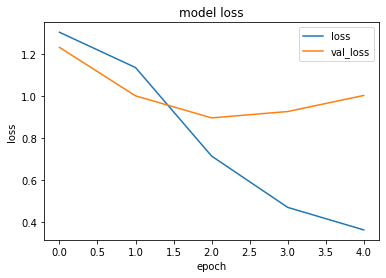

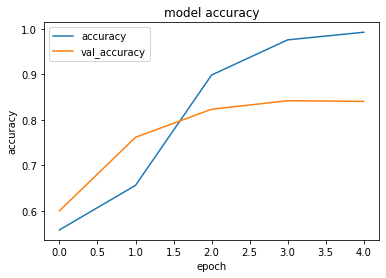

In [16]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

# Accuracy and Evaluation

In [17]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

21/21 [==============================] - 6s 277ms/step - loss: 0.3219 - accuracy: 0.9972
The train accuracy is: 0.9971809983253479
6/6 [==============================] - 1s 200ms/step - loss: 1.0025 - accuracy: 0.8407
The test accuracy is: 0.8407212495803833


# Conclusion
As we can see that the result is somewhat overfitting.This is because the dataset is very small to work with with deep learning.But my main focus of this notebook was to see what is the result of bangla sentiment analysis if i use a hybrid network.